In [1]:
# Data Manupulation
# DUMMY VARIABLE DISCUSSION LATER
import numpy as np
import pandas as pd


# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\diabetes.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']

print(df.head(5)) 

print(df.ndim)

print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
2
(768, 9)


In [2]:
# CATEGORY - OUTCOME - 0 and 1

In [3]:
dfInput = df.iloc[:,1:7] # 0  is not required
#print(df2.head())

#print(df.head())

dfoutput = df.iloc[:,-1]
#print(df3.head())

In [4]:
split = int(0.8*len(df))
#print(df2[:split])
#print(df2[:split].shape)

#print(df3[:split])
#print(df3[:split].shape)

#dfInput= x , dfoutput=Y

X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]
print(X_train.shape)
print(Y_train.shape)


(614, 6)
(614,)


In [5]:
model = LogisticRegression()
print(model)

LogisticRegression()


In [6]:
from sklearn import preprocessing
from sklearn import utils
# .MultiLabelBinarizer()  LabelEncoder LabelBinarizer
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y_train)
#print(encoded)
model = model.fit(X_train,encoded )
ms = model.score(X_train,encoded)
print("model score::",ms)

## need to get Dummy variables for Gender and Married columns

model score:: 0.7785016286644951


In [8]:
# probability YES | NO
#probability = model.predict_proba(X_test)

#print(probability)
#print("*" * 100)
print("Confusion Matrix")
predicted = model.predict(X_test)
print(metrics.confusion_matrix(Y_test , predicted))

Confusion Matrix
[[88 11]
 [28 27]]


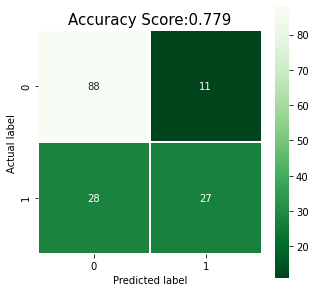

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test , predicted)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);

<AxesSubplot:xlabel='Outcome', ylabel='count'>

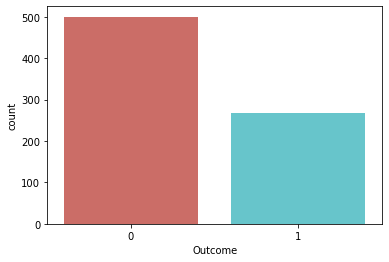

In [13]:
sns.countplot(x='Outcome',data=df, palette='hls')

In [40]:
# FILTER INSULIN > ) , BMI > 0
# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\diabetes.csv')
df = df[(df.Insulin > 0) & (df.BMI > 0)]
#print(df.head())
df.shape

(393, 9)

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


In [42]:
# improve RESULTS
dfClean = df.drop(['Pregnancies'], axis=1)
print(dfClean.head())

    Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3        89             66             23       94  28.1   
4       137             40             35      168  43.1   
6        78             50             32       88  31.0   
8       197             70             45      543  30.5   
13      189             60             23      846  30.1   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
4                      2.288   33        1  
6                      0.248   26        1  
8                      0.158   53        1  
13                     0.398   59        1  


In [45]:
split = int(0.8*len(dfClean))
dfInput = dfClean.iloc[:,[0,1,3,4,5]] # 0  is not required
dfoutput = dfClean.iloc[:,-1]
dfoutput.head()



3     0
4     1
6     1
8     1
13    1
Name: Outcome, dtype: int64

In [46]:
#print(df3.head())
# TWO CLASS - NOTE
X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]
model = LogisticRegression()

from sklearn import preprocessing
from sklearn import utils
# .MultiLabelBinarizer()  LabelEncoder LabelBinarizer

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y_train)
#print(encoded)
model = model.fit(X_train,encoded )
ms = model.score(X_train,encoded)
print("model score::",ms)

model score:: 0.7770700636942676


Confusion Matrix
[[49  5]
 [ 9 16]]


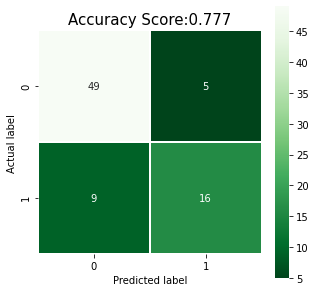

In [48]:
print("Confusion Matrix")
predicted = model.predict(X_test)
print(metrics.confusion_matrix(Y_test , predicted))
cm = metrics.confusion_matrix(Y_test , predicted)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);

In [49]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88        54
           1       0.76      0.64      0.70        25

    accuracy                           0.82        79
   macro avg       0.80      0.77      0.79        79
weighted avg       0.82      0.82      0.82        79



In [52]:
#ModuleNotFoundError: No module named 'ggplot'
#pip install ggplot
#pip install rpy2
# AttributeError: module 'pandas' has no attribute 'tslib'

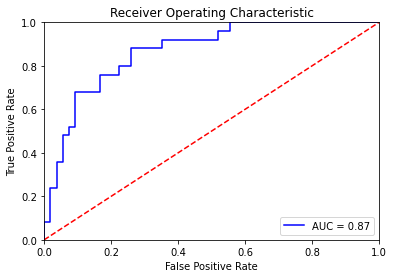

In [63]:
# code FROM https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

# ROC - AUC
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
cross_val = cross_val_score(LogisticRegression(), X_test,Y_test, scoring='accuracy', cv=10)

print(cross_val)

print(cross_val.mean()) 

[1.         0.75       0.875      0.5        0.75       0.75
 0.75       0.75       0.75       0.85714286]
0.7732142857142856
